In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_train=pd.read_csv('/content/Dataset1_Cleaned.csv')
df_train

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3642,1990-12-27,14.0
3643,1990-12-28,13.6
3644,1990-12-29,13.5
3645,1990-12-30,15.7


In [ ]:
df_train.shape

(3647, 2)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3647 non-null   object 
 1   Temp    3647 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.1+ KB


In [ ]:
df_train.describe()


,Temp
count,3647.000000
mean,11.177214
std,4.072706
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [ ]:
df_train.isnull().sum()

,0
Date,0
Temp,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
temperature = df_train['Temp'].values.reshape(-1, 1)  # Reshape to 2D
scaler = MinMaxScaler(feature_range=(0, 1))
df_train['Temp_Scaled'] = scaler.fit_transform(temperature) # Apply scaling to just the 'Temp' column and store in a new column

In [ ]:
df_train

,Date,Temp,Temp_Scaled
0,1981-01-01,20.7,0.787072
1,1981-01-02,17.9,0.680608
2,1981-01-03,18.8,0.714829
3,1981-01-04,14.6,0.555133
4,1981-01-05,15.8,0.600760
...,...,...,...
3642,1990-12-27,14.0,0.532319
3643,1990-12-28,13.6,0.517110
3644,1990-12-29,13.5,0.513308
3645,1990-12-30,15.7,0.596958


In [ ]:
df_train.duplicated().sum()

0

In [ ]:
# def create_dataset(dataset, look_back=1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset[i:(i+look_back), 0]
# 		dataX.append(a)
# 		dataY.append(dataset[i + look_back, 0])
# 	return np.array(dataX), np.array(dataY)

# # reshape into X=t and Y=t+1
# look_back = 3
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)
# # reshape input to be [samples, time steps, features]
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

# Define the sequence length
seq_length = 10

# Create sequences
x, y = create_sequences(df_train['Temp_Scaled'].values, seq_length)



In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

# Print shapes of the resulting arrays
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (2545, 10)
y_train shape: (2545,)
X_test shape: (1092, 10)
y_test shape: (1092,)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, input_shape=(seq_length, 1)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0537 - val_loss: 0.0102
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - val_loss: 0.0099
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0109 - val_loss: 0.0098
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0112 - val_loss: 0.0096
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - val_loss: 0.0097
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0108 - val_loss: 0.0092
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0103 - val_loss: 0.0089
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - val_loss: 0.0087
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0104 - val_loss: 0.0085
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - val_loss: 0.0083
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0096 - val

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075
Test loss: 0.007616383023560047
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


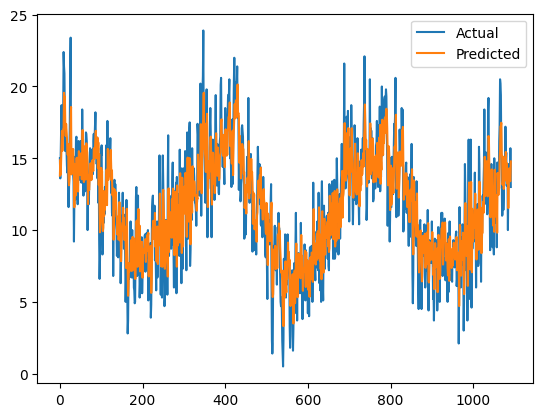

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()